## Web scraping and analysis

In [53]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [54]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 15
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews


In [55]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...


In [56]:
df.to_csv("data/BA_reviews.csv")

In [57]:
df

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...
...,...
1495,Two regular an uneventful flights. Curiously e...
1496,✅ Trip Verified | London to Belfast. Another r...
1497,✅ Trip Verified | Very full flight on G-BNLP/B...
1498,✅ Trip Verified | Warsaw to London. WAW is not...


In [58]:
# Removing ✅ Trip Verified | from each rocord
df["reviews"] = df["reviews"].str.replace("✅ Trip Verified |", "", regex=False)

In [59]:
df = df[~df["reviews"].str.startswith("Not Verified |", na=False)]

In [60]:
df["reviews"] = df["reviews"].str.replace("✅ Verified Review |", "", regex=False)

C:\Users\orias\AppData\Local\Temp\ipykernel_12940\3660134923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reviews"] = df["reviews"].str.replace("✅ Verified Review |", "", regex=False)


In [61]:
df

,reviews
0,Flight mainly let down by a disagreeable fl...
1,Another awful experience by British Airways...
2,"The service was rude, full of attitude to m..."
3,This flight was a joke. There was four peop...
4,This time British Airways managed to get ev...
...,...
1495,Two regular an uneventful flights. Curiously e...
1496,London to Belfast. Another regular flight by ...
1497,Very full flight on G-BNLP/B747 flying from M...
1498,Warsaw to London. WAW is not a pleasant airpo...


## Data Cleaning

In [63]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [64]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\orias\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\orias\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\orias\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [66]:
# Creating a function to Clean text
def clean_text(text):
    '''
    This function is used to remove punctuations in each review, 
    and also convert text to lower case
    '''
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords & Lemmatize
    return " ".join(words)

In [67]:
# Apply cleaning function
df["cleaned_reviews"] = df["reviews"].apply(clean_text)

C:\Users\orias\AppData\Local\Temp\ipykernel_12940\3757590342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cleaned_reviews"] = df["reviews"].apply(clean_text)


In [68]:
df

,reviews,cleaned_reviews
0,Flight mainly let down by a disagreeable fl...,flight mainly let disagreeable flight attendan...
1,Another awful experience by British Airways...,another awful experience british airway flight...
2,"The service was rude, full of attitude to m...",service rude full attitude food poorly service...
3,This flight was a joke. There was four peop...,flight joke four people business class includi...
4,This time British Airways managed to get ev...,time british airway managed get everything rig...
...,...,...
1495,Two regular an uneventful flights. Curiously e...,two regular uneventful flight curiously enough...
1496,London to Belfast. Another regular flight by ...,london belfast another regular flight british ...
1497,Very full flight on G-BNLP/B747 flying from M...,full flight gbnlpb747 flying miami london acco...
1498,Warsaw to London. WAW is not a pleasant airpo...,warsaw london waw pleasant airport one lounge ...


In [71]:
# Analysing the Frequency of Words

from collections import Counter

all_words = " ".join(df["cleaned_reviews"]).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(40)
print("Most Common Words:", most_common_words)

Most Common Words: [('flight', 2634), ('ba', 1536), ('seat', 1188), ('service', 957), ('time', 752), ('london', 731), ('crew', 670), ('hour', 662), ('food', 619), ('class', 598), ('cabin', 560), ('good', 549), ('one', 547), ('airline', 528), ('british', 521), ('business', 519), ('airway', 506), ('staff', 495), ('would', 467), ('u', 448), ('get', 438), ('heathrow', 403), ('passenger', 389), ('customer', 373), ('plane', 370), ('first', 367), ('day', 355), ('back', 339), ('experience', 338), ('boarding', 336), ('economy', 327), ('check', 325), ('could', 324), ('airport', 321), ('drink', 319), ('meal', 319), ('bag', 315), ('club', 312), ('even', 310), ('told', 306)]


In [72]:
#placing the most common words in a dataframe for better analysis
most_common_words = pd.DataFrame(most_common_words, columns=['word', 'count'])
most_common_words


,word,count
0,flight,2634
1,ba,1536
2,seat,1188
3,service,957
4,time,752
5,london,731
6,crew,670
7,hour,662
8,food,619
9,class,598


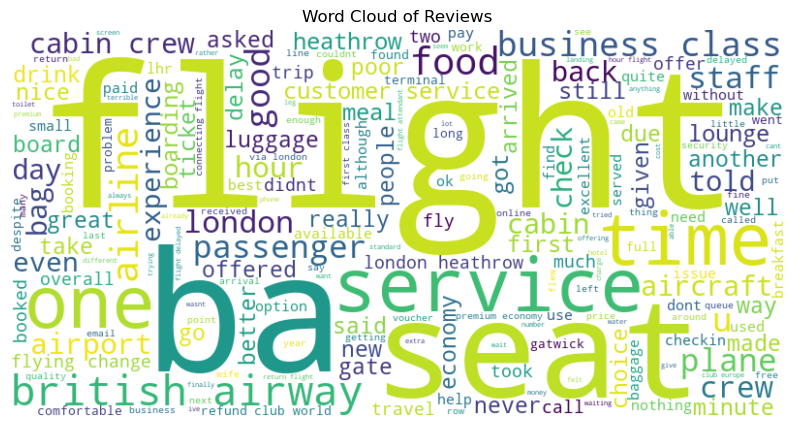

In [77]:
# Word Cloud of Reviews
import matplotlib.pyplot as plt
from wordcloud import WordCloud


plt.figure(figsize=(10,6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

In [82]:
# sentiment Analysis
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text).sentiment.polarity
    if analysis > 0:
        return "Positive"
    elif analysis < 0:
        return "Negative"
    else:
        return "Neutral"

In [83]:
df["sentiment"] = df["cleaned_reviews"].apply(get_sentiment)

C:\Users\orias\AppData\Local\Temp\ipykernel_12940\2967856326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = df["cleaned_reviews"].apply(get_sentiment)


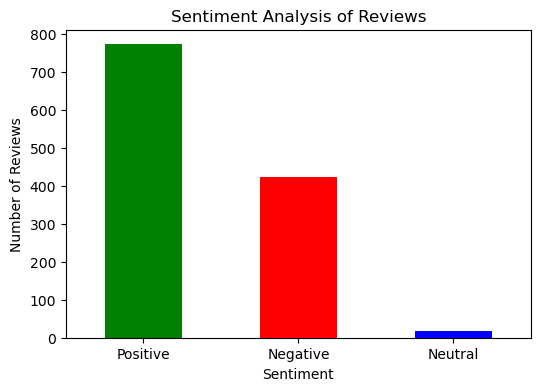

In [84]:
# **Sentiment Distribution**
sentiment_counts = df["sentiment"].value_counts()
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=["green", "red", "blue"])
plt.title("Sentiment Analysis of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

In [95]:
sentiment_counts

Positive    773
Negative    423
Neutral      17
Name: sentiment, dtype: int64

In [92]:
# ----------------------------
# **4. Topic Modeling (LDA)**
# ----------------------------
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000, stop_words="english")
X = vectorizer.fit_transform(df["cleaned_reviews"])

from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(X)

# **Display Topics**
terms = vectorizer.get_feature_names_out()
# Create a DataFrame to store topics
topics_dict = {"Topic": [], "Top Words": []}

for index, topic in enumerate(lda_model.components_):
    top_words = [terms[i] for i in topic.argsort()[-10:]]  # Top 10 words per topic
    topics_dict["Topic"].append(f"Topic {index + 1}")
    topics_dict["Top Words"].append(", ".join(top_words))  # Join words for readability

# Convert dictionary to DataFrame
topics_df = pd.DataFrame(topics_dict)


In [94]:
pd.set_option("display.max_colwidth", None)

topics_df

,Topic,Top Words
0,Topic 1,"delayed, day, told, airport, minute, london, time, ba, hour, flight"
1,Topic 2,"told, airport, baggage, london, flight, staff, day, luggage, bag, ba"
2,Topic 3,"staff, cabin, food, business, seat, row, luggage, ba, london, flight"
3,Topic 4,"boarding, food, lounge, ba, cabin, crew, service, club, good, flight"
4,Topic 5,"london, good, time, cabin, food, service, crew, seat, ba, flight"
5,Topic 6,"time, cancelled, london, ba, airline, service, customer, flight, airway, british"
6,Topic 7,"seat, service, nice, time, good, crew, meal, drink, food, flight"
7,Topic 8,"email, told, seat, paid, service, ticket, booked, refund, ba, flight"
8,Topic 9,"cabin, extra, passenger, flight, leg, ba, business, class, economy, seat"
9,Topic 10,"lounge, hour, british, service, london, seat, ba, flight, business, class"


In [90]:
import numpy as np

def plot_topic_distribution(lda_model, X):
    """Plot a bar chart showing the proportion of different topics in the dataset."""
    topic_distribution = np.array(lda_model.transform(X))  # Get topic probabilities for each document
    topic_counts = topic_distribution.argmax(axis=1)  # Get dominant topic for each document
    unique, counts = np.unique(topic_counts, return_counts=True)  # Count occurrences of each topic
    
    plt.figure(figsize=(10, 5))
    plt.bar(unique, counts / counts.sum() * 100, color='skyblue')  # Convert to percentages
    plt.xlabel("Topic Number")
    plt.ylabel("Percentage of Reviews")
    plt.title("Topic Distribution in Reviews")
    plt.xticks(unique, [f"Topic {i+1}" for i in unique])
    plt.show()

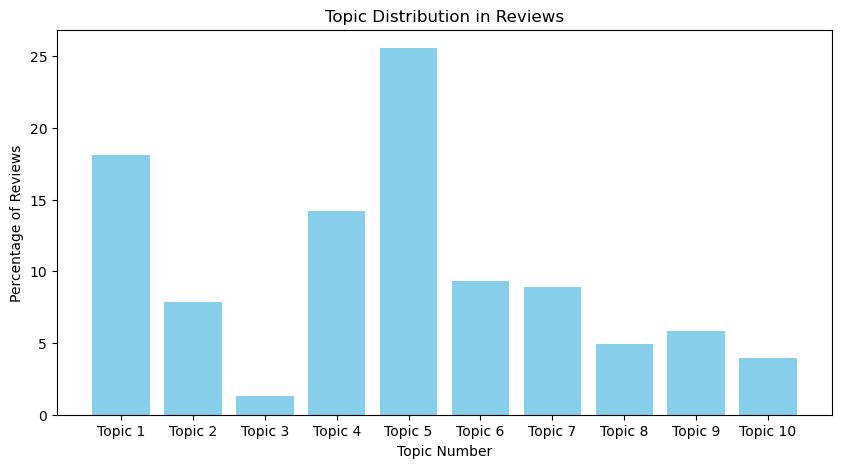

In [91]:
# Call the function to plot the distribution
plot_topic_distribution(lda_model, X)